# Authors:
    - Akash Tadwai- ES18BTECH11019
    - Vinta Reethu- ES18BTECH11028

# Importing Libraries

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pprint
from scipy.special import factorial
from scipy.stats import gamma
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline
import seaborn as sns
import scipy.special as sps  
sns.set(color_codes=True)
from IPython.display import display, Math, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
print("Setup Complete")

Setup Complete


# Downloading Data and Train Test Split

In [2]:
!wget http://www.randomservices.org/random/data/HorseKicks.txt -O /HorseKicks.txt

--2020-11-03 07:41:39--  http://www.randomservices.org/random/data/HorseKicks.txt
Resolving www.randomservices.org (www.randomservices.org)... 66.96.149.1
Connecting to www.randomservices.org (www.randomservices.org)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 711 [text/plain]
Saving to: ‘/HorseKicks.txt’

/HorseKicks.txt     100%[===================>]     711  --.-KB/s    in 0s      

2020-11-03 07:41:39 (109 MB/s) - ‘/HorseKicks.txt’ saved [711/711]



In [3]:
data = pd.read_csv('/HorseKicks.txt', sep="\t", index_col='Year')# Loading the dataset csv file
print(data)
print("Dimensions of data are {}".format(data.shape))

      GC  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C14  C15
Year                                                            
1875   0   0   0   0   0   0   0   1   1   0    0    0    1    0
1876   2   0   0   0   1   0   0   0   0   0    0    0    1    1
1877   2   0   0   0   0   0   1   1   0   0    1    0    2    0
1878   1   2   2   1   1   0   0   0   0   0    1    0    1    0
1879   0   0   0   1   1   2   2   0   1   0    0    2    1    0
1880   0   3   2   1   1   1   0   0   0   2    1    4    3    0
1881   1   0   0   2   1   0   0   1   0   1    0    0    0    0
1882   1   2   0   0   0   0   1   0   1   1    2    1    4    1
1883   0   0   1   2   0   1   2   1   0   1    0    3    0    0
1884   3   0   1   0   0   0   0   1   0   0    2    0    1    1
1885   0   0   0   0   0   0   1   0   0   2    0    1    0    1
1886   2   1   0   0   1   1   1   0   0   1    0    1    3    0
1887   1   1   2   1   0   0   3   2   1   1    0    1    2    0
1888   0   1   1   0   0 

In [4]:
# Train test split
X_train = data.iloc[:-7]
X_test = data.iloc[-7:]

# MLE

Suppose that $X=\left(X_{1}, X_{2}, \ldots, X_{n}\right)$ are iid observations from a Poisson distribution with unknown parameter $\lambda .$ The likelihood function is:

$$
\begin{aligned}
f\left(x_{i}, \lambda\right)= \frac{e^{-\lambda} \lambda^{x_{i}}}{x_{i} !} \\
L(\lambda, \boldsymbol{x})=\prod_{i=1}^{n} f\left(x_{i}, \lambda\right)=\prod_{i=1}^{n} \frac{e^{-\lambda} \lambda^{x_{i}}}{x_{i} !} &=\frac{e^{-n \lambda} \lambda^\sum x_{i}}{\prod_{i=1}^{n} x_{i} !} \\
I(\lambda)=\log L(\lambda, \boldsymbol{x})=-n \lambda+\sum x_{i} \log \lambda-\log \left\{\prod_{i=1}^{n} x_{i} !\right\} \\
\frac{d l}{d \lambda}=-n+\frac{\sum x_{i}}{\lambda}=\frac{\sum x_{i}-n \lambda}{\lambda} &>0 \quad \text { if } \lambda<\bar{x} \\
&<0 \quad \text { if } \lambda>\bar{x}
\end{aligned}
$$
</font>
&emsp;$\Rightarrow$ $\hat{\lambda}_{MLE}=\bar{X}$ is the $\mathrm{MLE}$ of $\lambda$.


In [5]:
class MLE: 
    def __init__(self) :
        self.data=data
        self.X_train = X_train 
        self.X_test = X_test
        self.lambdahat = None
 
    def lambda_estimate(self, df) -> np.array :
        # function to find out the lamda estimate from MLE
        data = df.to_numpy()
        self.lambdahat = np.mean(data,axis=0)
        return self.lambdahat
 
    def RMSE(self, preds, targets)-> np.array:
        # formula that calculates the root mean square
        return np.sqrt(np.mean(np.square(preds - targets),axis=0))
 
    def error(self,df) -> np.array:
        # function that calculates RSME between predictions and targets 
        test = df.to_numpy()
        lambdahat = self.lambdahat
        lambdahat = np.expand_dims(lambdahat,axis=0) # Change shape from (14,) to (1,14)
        lambdahat = np.repeat(lambdahat,test.shape[0],axis=0) # stack those together
        error = self.RMSE(lambdahat,test)
        return error 
 
    def deathsCorpyear(self, df) -> list : 
        # function that gives the count of 0s,1s,2s,3s,4s deaths respectively
        data_np = df.to_numpy()
        lis = []
        lis = np.array(np.bincount(data_np.flatten(), minlength=5))
        return lis
 
    def plot(self) -> None :
        # plot of Number of Corp-years vs Number of deaths
        plt.figure(figsize=(12, 6))
        plt.title("Deaths by HorseKicks")
        lis = self.deathsCorpyear(data)
        sns.barplot(x=np.arange(5), y=lis)
        plt.xlabel("Number of deaths")
        plt.ylabel("Number of corps-years")

In [6]:
res_mle=MLE()                                       # Creating Object
L = np.around(res_mle.lambda_estimate(X_train),4)   # Finding lambda estimates for each corp
err = np.around(res_mle.error(X_test),4)            # Finding RMSE for each corp from the obtained lambda estimates
cnt=0
print("Lambda estimate and RMSE (predictions) for each corps are :")
print("Corp"+" lambdaEstimate"+"\tRMSE")
for col in data.columns:                            # Printing the results
    print(str(col)+":\t"+str(L[cnt])+"\t\t"+str(err[cnt]))
    cnt+=1 

Lambda estimate and RMSE (predictions) for each corps are :
Corp lambdaEstimate	RMSE
GC:	1.0		0.7559
C1:	0.6923		1.1124
C2:	0.6154		0.7298
C3:	0.6154		0.7298
C4:	0.4615		0.4848
C5:	0.3846		0.588
C6:	0.8462		0.9898
C7:	0.5385		0.898
C8:	0.3077		0.5094
C9:	0.6923		0.7384
C10:	0.5385		1.1597
C11:	1.0		1.1339
C14:	1.4615		1.0238
C15:	0.3077		0.9412


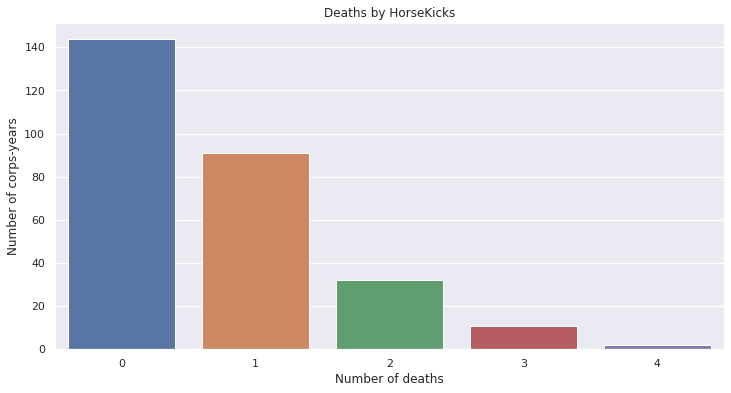

In [7]:
res_mle.plot()      # Final plot of number of deaths by Horsekicks 

# MAP
According to Baye's theorem
$$
\mathcal{P}(\lambda \mid x)=\frac{P(x \mid \lambda) \cdot P(\lambda)}{P\left(x\right)},\quad \text{where } P(x) \text{ is independent of } \lambda
$$
We know that
$$
\mathcal{P}(x \mid \lambda)=\prod_{i=1}^{N} \frac{e^{-\lambda}{\lambda}^{x_i}}{{x_{i} !} }
$$
Taking Gamma Prior,
$$
P(\lambda)=\frac{\beta^{\alpha} \lambda^{\alpha-1} e^{-\beta \lambda}}{\Gamma(\alpha)}
$$
Now applying Baye's theorem, \\
$$
\begin{aligned}
P(\lambda \mid x) &=\frac{e^{-n \lambda} \lambda^{\sum x_{i}}}{\prod_{i=1}^{N} x_{i} !} \cdot \frac{\lambda^{\alpha-1} \cdot e^{-\beta \lambda}}{\Gamma(\alpha)} \\
&=k \cdot \lambda^{(\sum x_{i}+\alpha-1)} \cdot e^{-\lambda(n+\beta)} \\
\Rightarrow \operatorname{Gamma}(\sum x_{i}+\alpha, \beta+N) \\
\end{aligned}
$$
Hence the MAP estimate would be the mode of the posterior distribution. \\
We know that the Mode of Gamma distribution is, $\frac{\alpha -1}{\beta}$

&emsp;$\Rightarrow$ $\hat{\lambda}_{MAP}=\frac{\sum x_{i}+\alpha - 1}{N+\beta}$ is the $\mathrm{MAP}$ of $\lambda$.

As Gamma distribution is the prior for Poisson distribution. We chose $\alpha$ and $\beta$ such that, Mode of the prior is tending to zero, as parameters estimated using MLE are close to zero. As some of the lambdas are also tending to 1 we choose the Gamma distribution such that the Variance is maximum possible.

\begin{align}
Mode &\rightarrow   max(0,\frac{\alpha -1}{\beta }) \\
Variance &\rightarrow \frac{\alpha}{\beta ^ 2}
\end{align}

In [8]:
class MAP(MLE):   
      
    def __init__(self):
        # Intialising values
        super().__init__()
        self.summ,self.fact =self.sumfact(X_train)
        self.lambdahat=np.zeros(len(self.data.columns))
        self.alpha=1.5325404699829679
        self.beta=1

    def sumfact(self,df):
        # Function to obtain summation of each column and sum of factorials of each element in training set
        data=df.to_numpy()
        return np.sum(data,axis=0),np.product(factorial(data),axis=0).astype(int)
        
    def lambda_estimate(self,index,alpha,beta):
        # Function to obtain lambda estimate for a particular corp year
        N=X_train.shape[0]
        lambdaest=(self.summ[index]+alpha-1)/(N+beta)
        return lambdaest

In [9]:
res_map=MAP()  #Calling map object

In [10]:
for i in range(len(data.columns)):              # Obtaining lambda estimates from the hyper tuned alpha,beta
    res_map.lambdahat[i]=res_map.lambda_estimate(i,res_map.alpha,res_map.beta)

res_map.lambdahat=np.around(res_map.lambdahat,4)    # Rounding-off
rmse=res_map.error(X_test)                          # Finding RMSEs for testset
rmse=np.around(res_map.error(X_test),4)             # Rounding-off
cnt=0
print("Lambda estimate and RMSE (predictions) for each corps are :")
print("Corp\t"+"lambdaEstimate\t"+"RMSE")           # Printing the values
for col in data.columns:
    print(str(col)+":\t"+str(res_map.lambdahat[cnt])+"\t\t"+str(rmse[cnt]))
    cnt+=1

Lambda estimate and RMSE (predictions) for each corps are :
Corp	lambdaEstimate	RMSE
GC:	0.9666		0.731
C1:	0.6809		1.1157
C2:	0.6095		0.7294
C3:	0.6095		0.7294
C4:	0.4666		0.4866
C5:	0.3952		0.5795
C6:	0.8238		0.9903
C7:	0.538		0.8981
C8:	0.3238		0.5058
C9:	0.6809		0.7366
C10:	0.538		1.1599
C11:	0.9666		1.1552
C14:	1.3952		0.9764
C15:	0.3238		0.9368


# Plots

In [11]:
# Likelihood Distribution
def Likelihood_plot(lambdahat,index):
    x=np.linspace(0,5)                #Setting the x range, Here x is lambda
    y=(np.exp(-1*res_map.X_train.shape[0]*x)*np.power(x, res_map.summ[index])) / (1.0*res_map.fact[index]) # Writing the y equation  
    ymax=np.array(max(y))             # Finding the maximum value of y 
    xpos=np.where(y==ymax)            # Finding the index value of y where maximum value is obtained
    xmax=x[xpos]                      # Getting the maximum value of x
    plt.plot(x,y)                     # Plotting the graph
    plt.title("Likelihood plot of corp {}".format(index))
    plt.xlabel("lambda")
    plt.ylabel("Pdf")
    plt.annotate('Mode = (%.4f,%e)'%(xmax, ymax),xy=(xmax,ymax),arrowprops=dict(facecolor='black')) # Marking the mode in the graph
    plt.show()

In [12]:
#Prior Plot 
def Prior_plot(alpha,beta,index):
    x=np.linspace(0,5)                       # Setting the x range, Here x is lambda
    y=gamma.pdf(x,a=alpha,scale=1/beta)      # Writing the y equation 
    ymax=np.array(max(y))                    # Finding the maximum value of y
    xpos=np.where(y==ymax)                   # Finding the index value of y where maximum value is obtained
    xmax=x[xpos]                             # Getting the maximum value of x
    plt.plot(x,y)                            # Plotting the graph
    plt.title("Prior plot of corp {}".format(index))
    plt.xlabel("lambda")
    plt.ylabel("Pdf")
    plt.annotate('Mode = (%.4f,%2f)'%(xmax, ymax),xy=(xmax,ymax),arrowprops=dict(facecolor='black')) # Marking the mode in the graph
    plt.show()

In [13]:
# Posterior plot
def Posterior_plot(alpha,beta,index):
    x=np.linspace(0,5)
    N=res_map.X_train.shape[0]                 # Setting the x range, Here x is lambda
    y=gamma.pdf(x,a=alpha+res_map.summ[index],scale=1/(beta+N))   # Writing the y equation 
    ymax=np.array(max(y))                      # Finding the maximum value of y
    xpos=np.where(y==ymax)                     # Finding the index value of y where maximum value is obtained
    xmax=x[xpos]                               # Getting the maximum value of x
    plt.plot(x,y)                              # Plotting the graph
    plt.title("Posterior plot of corp {}".format(index))
    plt.xlabel("lambda")
    plt.ylabel("Pdf")
    plt.annotate('Mode = (%.2f,%.2f)'%(xmax, ymax),xy=(xmax,ymax),arrowprops=dict(facecolor='black')) # Marking the mode in the graph
    plt.show()

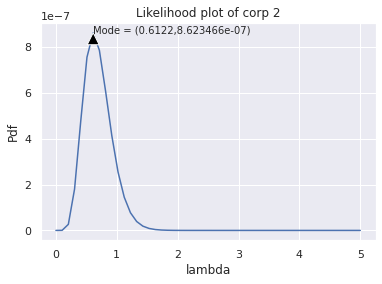

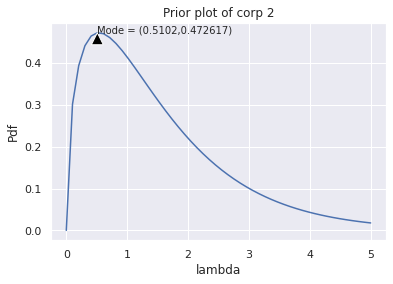

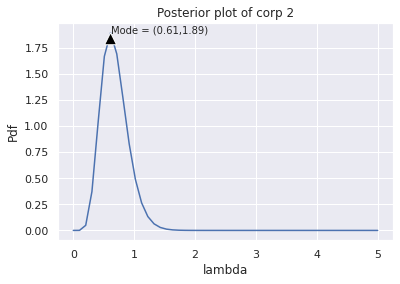

In [14]:
# Calling plots of corp 2
Likelihood_plot(res_mle.lambdahat[2],2)
Prior_plot(res_map.alpha,res_map.beta,2)
Posterior_plot(res_map.alpha,res_map.beta,2)

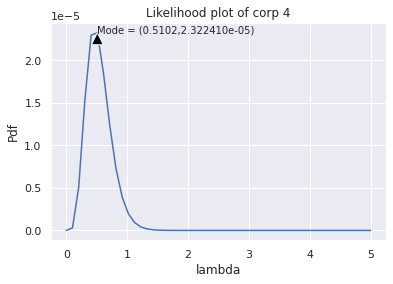

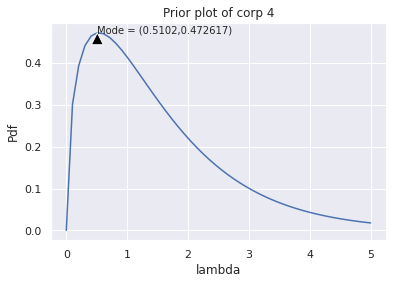

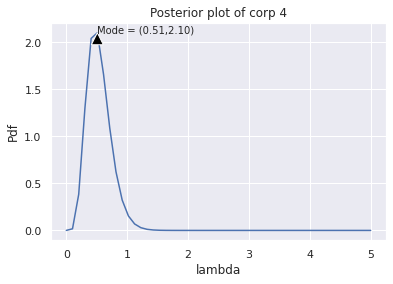

In [15]:
# Calling plots of corp 4
Likelihood_plot(res_mle.lambdahat[4],4)
Prior_plot(res_map.alpha,res_map.beta,4)
Posterior_plot(res_map.alpha,res_map.beta,4)

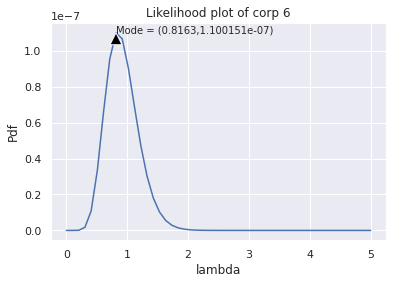

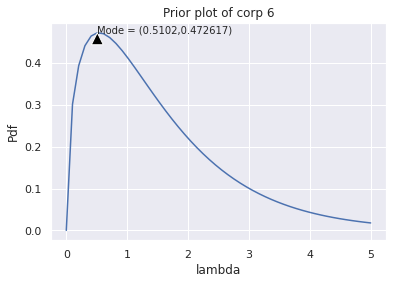

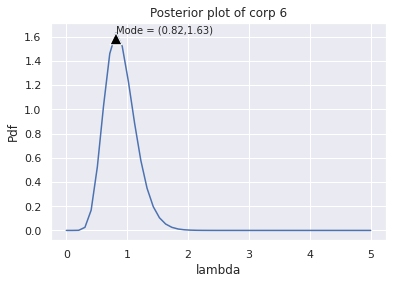

In [16]:
# Calling plots of corp 6
Likelihood_plot(res_mle.lambdahat[6],6)
Prior_plot(res_map.alpha,res_map.beta,6)
Posterior_plot(res_map.alpha,res_map.beta,6)